# UK Python Users

## Data Source

This is an analysis of the **2019 StackOverflow survey** data, available [here](https://insights.stackoverflow.com/survey).

The data includes information about StackOverflow users from across the world, including demographics, primary programming languages, salaries and more.

This analysis looks only at **UK** users who use **Python** and are **employed full time**.

The code to analyse the data and produce the charts is hidden by default but you can **view the code** by clicking on the `Show Code` button at the top left of the page.

In [245]:
import numpy as np

import pandas as pd

# Show a chart created using matplotlib directly under the code that produces it
%matplotlib inline

# Import pyplot from the matplotlib library, for creating charts
from matplotlib import pyplot as plt

# Import seaborn for additional chart styles
import seaborn as sns; sns.set()

# Configure the aesthetics of the charts
plt.rcParams['figure.figsize'] = (18, 12)
plt.rcParams['figure.facecolor'] = '#FFFFFF'
plt.rcParams['figure.frameon'] = False
plt.rcParams['axes.facecolor'] = '#FFFFFF'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['savefig.facecolor'] = '#FFFFFF'

sns.set(style="ticks", color_codes=True)
sns.set_context("notebook")

sns.set({ "figure.figsize": (12/1.5,8/1.5) })
sns.set_style("white", {'axes.edgecolor':'gray'})

# Read in the csv of the global data into a dataframe called s
s = pd.read_csv('survey_results_public.csv')

## Overview

In [246]:
# Create a new dataframe, p_uk, containing responses from UK users who use Python
# and are employed full time.
p_uk = s.loc[ 
    (s['Country']=='United Kingdom') &
    (s['LanguageWorkedWith'].str.contains('Python') &
    (s['Employment']=='Employed full-time'))
]

In [247]:
# How many UK Python users (employed full time) responded to the survey?
str(len(p_uk)) + ' UK Python users employed full time ('\
+  str(round(len(p_uk)/len(s)*100, 2))\
+ '% of all survey respondents) responded.'

'1772 UK Python users employed full time (1.99% of all survey respondents) responded.'

## Top 10 Tools

In [248]:
# Separate each 'LanguageWorkedWith' value into a list of words, 
# by splitting where there is a semi-colon
lang_lists = p_uk['LanguageWorkedWith'].str.split(";")

# Create an empty list called lang_col, that will be used to
# store one language per row in the subsequent 'for' loop
lang_col = []

# loop through each row, and each element in the list in each row,
# and add the language in each element to the lang_col list
for row in lang_lists:
    for element in row:
        lang_col.append(element)

# change the lang_col series into a dataframe
lang_col_df = pd.DataFrame(lang_col)

# Rename the column from '0' to 'Language'
lang_col_df.columns=['Language']

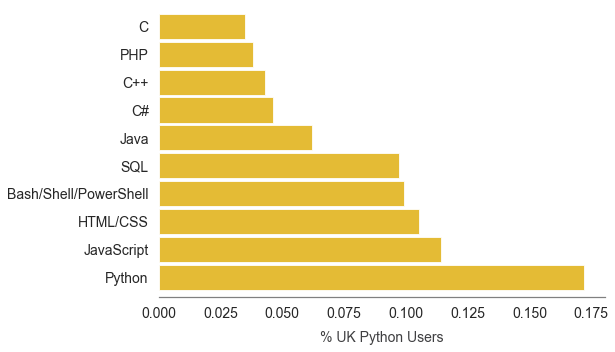

In [249]:
# display a horizontal bar chart of the top 10 tools and their percentage
lang_col_df['Language'].value_counts(normalize=True).head(10)\
.plot.barh(color='#deaa02', alpha=0.8, width=0.9);

# adjust the style elements of the plot
plt.ylabel(None);
plt.xlabel('% UK Python Users', fontsize=14, color='#3F3F41');
plt.tick_params(labelsize=14, color='#3F3F41');
plt.legend().set_visible(False);
sns.despine(left=True);

## Top 10 Roles

In [250]:
# How are UK Python users using code? Are they professional 
# developers / use code as part of their work or something else?

# Create new dataframe of UK python users (who are employed full time) roles (DevTypes)
# where there is no missing value
devtypes_notmissing = pd.DataFrame(p_uk.loc[p_uk['DevType'].notnull(), 'DevType'])

# Separate each 'DevType' value into a list of words, 
# by splitting where there is a semi-colon
devtype_lists = devtypes_notmissing['DevType'].str.split(";")


# Create an empty list called devtype_col, that will be used to
# store one role per row in the subsequent 'for' loop
devtype_col = []

# loop through each row, and each element in the list in each row,
# and add the role in each element to the devtype_col list
for row in devtype_lists:
    for element in row:
        devtype_col.append(element)

# change the devtype_col series into a dataframe
devtype_col_df = pd.DataFrame(devtype_col)

# Rename the column from '0' to 'Role'
devtype_col_df.columns=['Role']

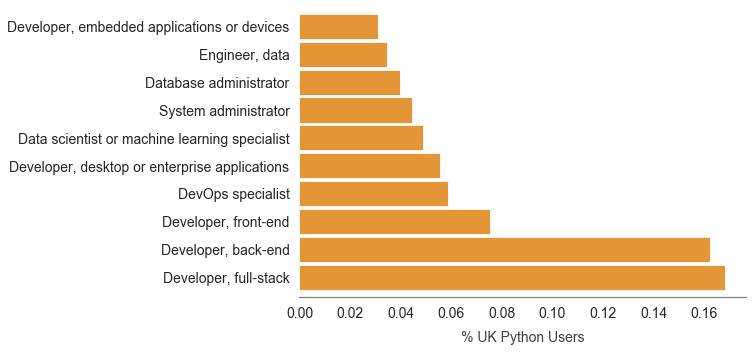

In [251]:
# display a horizontal bar chart of the top 10 roles and their percentage
devtype_col_df['Role'].value_counts(normalize=True).head(10)\
.plot.barh(color='#de7b02', alpha=0.8, width=0.9);

# adjust the style elements of the plot
plt.ylabel(None);
plt.xlabel('% UK Python Users', fontsize=14, color='#3F3F41');
plt.tick_params(labelsize=14, color='#3F3F41');
plt.legend().set_visible(False);
sns.despine(left=True);

## Gender

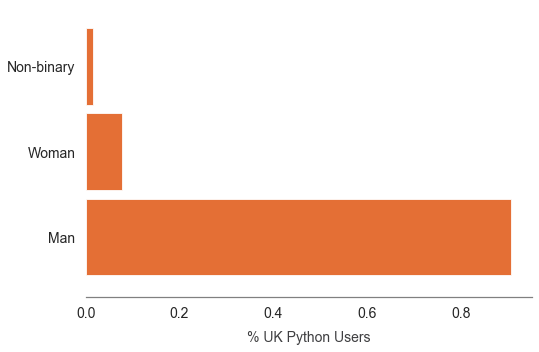

In [252]:
# edit the gender values to shorter descriptions to make the plot more readable
p_uk.loc[p_uk.Gender ==\
         'Woman;Man', 'Gender'] = 'Non-binary'
p_uk.loc[p_uk.Gender ==\
         'Non-binary, genderqueer, or gender non-conforming', 'Gender'] = 'Non-binary'
p_uk.loc[p_uk.Gender ==\
         'Woman;Non-binary, genderqueer, or gender non-conforming', 'Gender'] = 'Non-binary'
p_uk.loc[p_uk.Gender ==\
         'Man;Non-binary, genderqueer, or gender non-conforming', 'Gender'] = 'Non-binary'

# display a horizontal bar chart of each gender and its percentage
p_uk['Gender'].value_counts(normalize=True).plot.barh(color='#de4b02', alpha=0.8, width=0.9);

# adjust the style elements of the plot
plt.ylabel(None);
plt.xlabel('% UK Python Users', fontsize=14, color='#3F3F41');
plt.tick_params(labelsize=14, color='#3F3F41');
plt.legend().set_visible(False);
sns.despine(left=True);

## Age

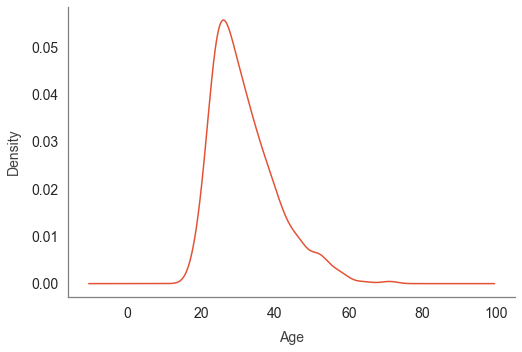

In [253]:
# display a density plot of the frequency of each age
p_uk['Age'].plot.kde(color='#de2702', alpha=0.8);

# adjust the style elements of the plot
plt.ylabel('Density', fontsize=14, color='#3F3F41');
plt.xlabel('Age', fontsize=14, color='#3F3F41');
plt.tick_params(labelsize=14, color='#3F3F41');
sns.despine();

## Education

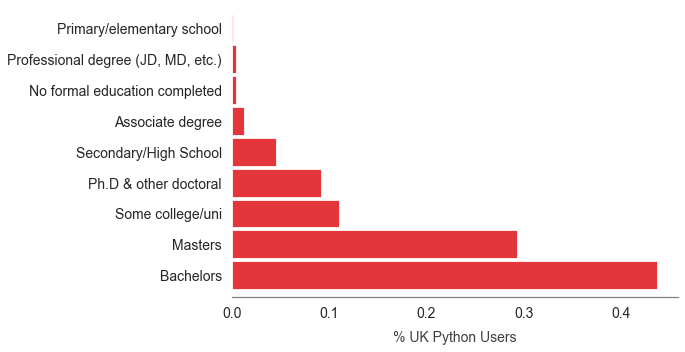

In [254]:
# disable the warning for the use of the chains below
pd.options.mode.chained_assignment = None  # default='warn'

# edit the education level values to shorter descriptions to make the plot more readable
p_uk.loc[
    p_uk.EdLevel ==\
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',\
    'EdLevel'] = 'Secondary/High School'

p_uk.loc[
    p_uk.EdLevel ==\
    'Some college/university study without earning a degree',\
    'EdLevel'] = 'Some college/uni'
    
p_uk.loc[
    p_uk.EdLevel ==\
    'Master’s degree (MA, MS, M.Eng., MBA, etc.)',\
    'EdLevel'] = 'Masters'
    
p_uk.loc[p_uk.EdLevel == \
         'Other doctoral degree (Ph.D, Ed.D., etc.)',\
         'EdLevel'] = 'Ph.D & other doctoral'
    
p_uk.loc[p_uk.EdLevel == \
         'I never completed any formal education',\
         'EdLevel'] = 'No formal education completed'
    
p_uk.loc[p_uk.EdLevel ==\
         "Bachelor’s degree (BA, BS, B.Eng., etc.)",\
         'EdLevel'] = 'Bachelors'
    

p_uk['EdLevel'].value_counts(normalize=True)\
.plot.barh(color='#de0209', alpha=0.8, width=0.9);

# adjust the style elements of the plot
plt.ylabel(None);
plt.xlabel('% UK Python Users', fontsize=14, color='#3F3F41');
plt.tick_params(labelsize=14, color='#3F3F41');
plt.legend().set_visible(False);
sns.despine(left=True);

## Salary

In [255]:
# create a data frame of responses where the salary has been provided and
# the salary currency is GBP
p_uk_GBP_salaries = p_uk.loc[
    (p_uk['CompTotal'].notnull()) & 
    (p_uk['CurrencySymbol']=='GBP') 
]

# Display the median salary for those responses
'The median salary paid in GBP for UK Python users employed full time is '\
+ str(round(p_uk_GBP_salaries['CompTotal'].median()))

'The median salary paid in GBP for UK Python users employed full time is 45000'

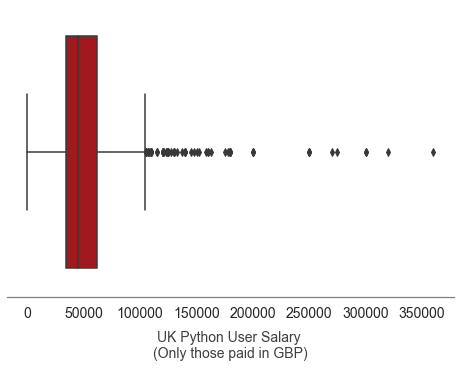

In [256]:
# display a boxplot of the non-null GBP salaries
sns.boxplot(p_uk_GBP_salaries['CompTotal'], color='#b80208');

# adjust the style elements of the plot
plt.xlabel('UK Python User Salary \n(Only those paid in GBP)',\
           fontsize=14, color='#3F3F41');
plt.tick_params(labelsize=14, color='#3F3F41');
sns.despine(left=True);

Breaking that down by gender...

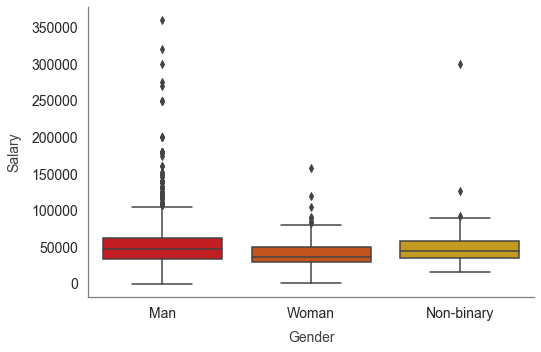

In [257]:
# display a box plot of non-null GBP salaries per gender
with sns.color_palette(['#de0209', '#de4b02', '#deaa02']):
    sns.boxplot(x='Gender', y='CompTotal', data=p_uk_GBP_salaries);
    
# adjust the style elements of the plot
plt.xlabel('Gender', fontsize=14, color='#3F3F41');
plt.ylabel('Salary', fontsize=14, color='#3F3F41');
plt.tick_params(labelsize=14, color='#3F3F41');
sns.despine();

Removing the outliers by only looking at salaries below £125k...

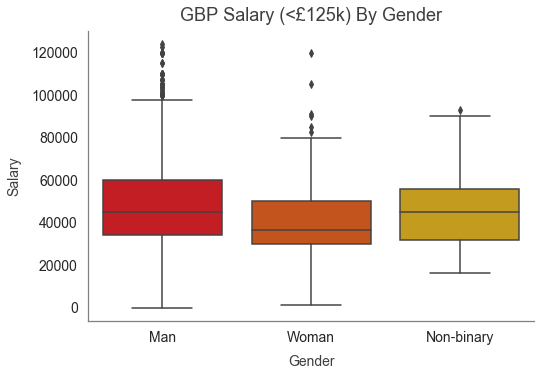

In [258]:
# display a box plot of non-null GBP salaries per gender
# where the salary is under £125k, so that the distributions can
# be compared without the biggest outliers
with sns.color_palette(['#de0209', '#de4b02', '#deaa02']):
    sns.boxplot(x='Gender', 
                y='CompTotal', 
                data=p_uk_GBP_salaries.loc[p_uk_GBP_salaries['CompTotal']<125000]
               );

# adjust the style elements of the plot    
plt.title('GBP Salary (<£125k) By Gender', fontsize=18, color='#3F3F41');
plt.xlabel('Gender', fontsize=14, color='#3F3F41');
plt.ylabel('Salary', fontsize=14, color='#3F3F41');
plt.tick_params(labelsize=14, color='#3F3F41');
sns.despine();

Median salary per gender:

In [259]:
# create a data frame of the median non-null GBP salary per gender
meds = pd.DataFrame(
    p_uk_GBP_salaries.groupby(by='Gender')['CompTotal']\
    .median()
)

# make the index (gender) a column
meds.reset_index(inplace=True)

# rename the column headings
meds.columns = ['Gender', 'Median Salary']

# display the data frame of median salaries per gender
meds

,Gender,Median Salary
0,Man,47000.0
1,Non-binary,45000.0
2,Woman,37000.0


Comparing the salary distributions of women by their education level...

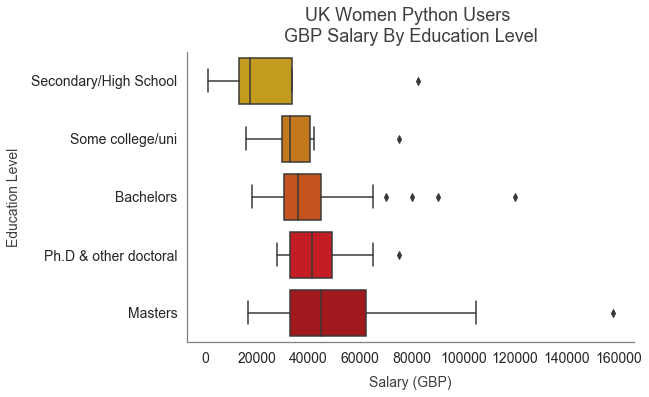

In [260]:
# create a dataframe containing only the non-null GBP salaries 
# of UK python users who identify as a woman, and only
# keep the columns containing salary and education level
uk_python_women = p_uk_GBP_salaries.loc[
    p_uk_GBP_salaries.Gender=='Woman',
    ['Gender', 'EdLevel', 'CompTotal']
]

# display a box plot of salary per education level
with sns.color_palette(['#deaa02', '#de7b02', '#de4b02', '#de0209', '#b80208']):
    sns.boxplot(y='EdLevel', 
            x='CompTotal', 
            data=uk_python_women,
            order=['Secondary/High School', 
                   'Some college/uni', 
                   'Bachelors', 
                   'Ph.D & other doctoral', 
                   'Masters']
           );

# adjust the style elements of the plot    
plt.title("UK Women Python Users \nGBP Salary By Education Level", 
          fontsize=18, 
          color='#3F3F41');
plt.ylabel('Education Level', 
           fontsize=14, 
           color='#3F3F41');
plt.xlabel('Salary (GBP)', 
           fontsize=14, 
           color='#3F3F41');
plt.tick_params(labelsize=14, 
                color='#3F3F41');
sns.despine();